In [1]:
import pandas as pd
import numpy as np
from caits import visualization as vis
from caits import properties as props
from scipy.signal import square

In [2]:
sampling_rate = 1000
duration = 2.0

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Channel 1: pure sine wave, 10 Hz
ch1 = np.sin(2 * np.pi * 10 * t)

# Channel 2: amplitude-modulated sine wave (AM)
modulator = 0.5 * (1 + np.sin(2 * np.pi * 1 * t))  # modulation 1 Hz
ch2 = modulator * np.sin(2 * np.pi * 10 * t)

# Channel 3: square wave
ch3 = square(2 * np.pi * 5 * t)

# Combine to DataFrame
data = np.stack((ch1, ch2, ch3), axis=-1)

data.shape

(2000, 3)

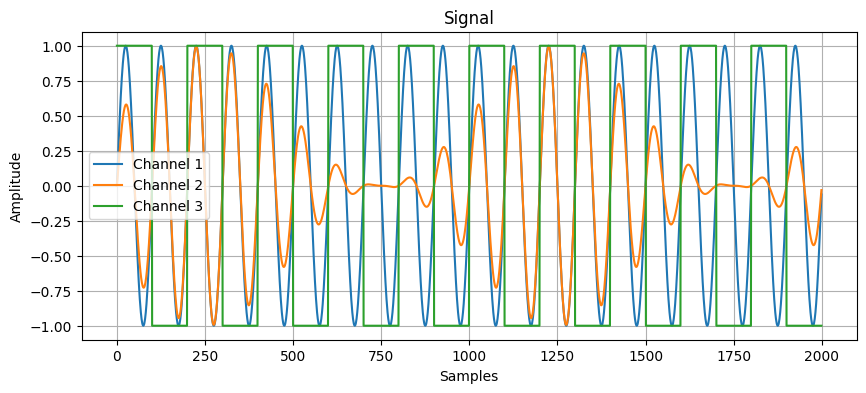

In [3]:
fig = vis.plot_signal(data, sampling_rate)

In [4]:
amp_signals = props.amplitude_envelope_hbt(data, sampling_rate, 0)
amp_signals.shape

(1000, 3)

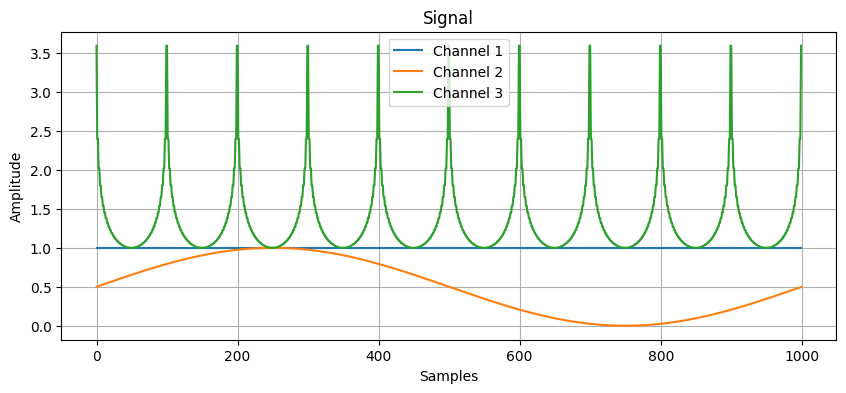

In [5]:
fig = vis.plot_signal(amp_signals, sampling_rate)

In [6]:
inst_signals = props.instantaneous_frequency_hbt(data, sampling_rate, axis=0)
inst_signals.shape

(1999, 3)

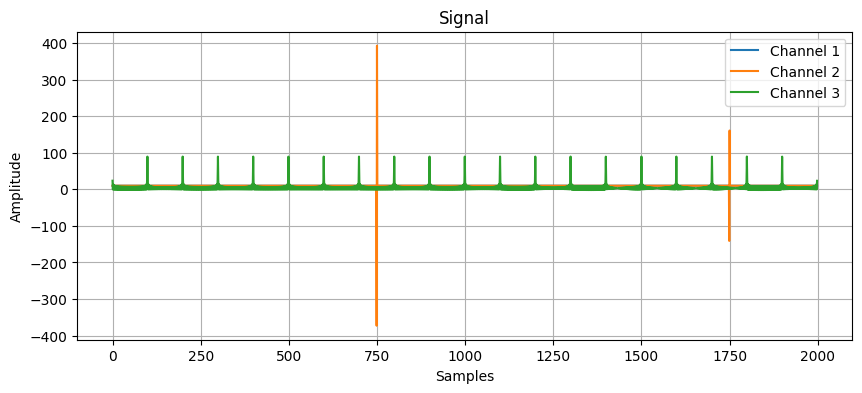

In [7]:
fig = vis.plot_signal(inst_signals, sampling_rate)

In [8]:
inst_amps = props.instantaneous_amplitude_hbt(data, axis=0)
inst_amps.shape

(2000, 3)

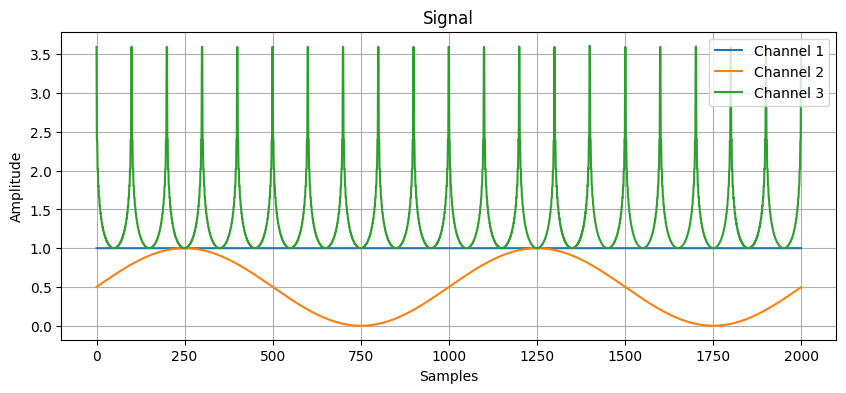

In [9]:
fig = vis.plot_signal(inst_amps, sampling_rate)

In [10]:
smas = props.sma_signal(data, axis=0)
smas.shape

(3,)

In [14]:
smas

array([1272.82063815,  636.41031908, 2000.        ])

In [12]:
mags = props.magnitude_signal(data, axis=0)
mags.shape

(3,)

In [13]:
mags

array([31.6227766 , 19.36491673, 44.72135955])